In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
train_df = pd.read_csv('train.csv')


In [74]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
test_df = pd.read_csv('test.csv')

In [76]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [78]:
# Convert some columns into categorical data
train_df["Survived"] = train_df["Survived"].astype('category')
train_df["Pclass"] = train_df["Pclass"].astype('category')
test_df["Pclass"] = test_df["Pclass"].astype('category')
train_df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
train_df[train_df['Sex']=='male']['Sex'].count()

577

In [80]:
train_df[train_df['Sex']=='female']['Sex'].count()

314

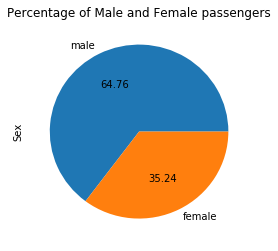

In [81]:
train_df["Sex"].value_counts().plot.pie(figsize=(4, 4),
                                     autopct='%.2f',
                                     title="Percentage of Male and Female passengers",
                                     fontsize = 10)

In [82]:
train_df[train_df['Survived']==1]['Survived'].count()

342

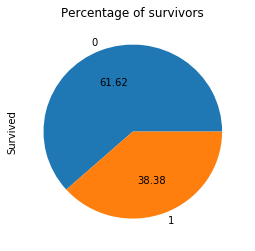

In [83]:
train_df['Survived'].value_counts().plot.pie(figsize=(4, 4),
                                            autopct='%.2f',
                                            title="Percentage of survivors",
                                            fontsize = 10)

In [84]:
train_df[(train_df['Sex']=='male') & (train_df['Survived']==1)]['Name'].count()

109

In [85]:
train_df[(train_df['Sex']=='female') & (train_df['Survived']==1)]['Name'].count()

233

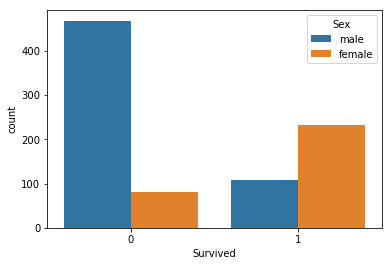

In [86]:
sns.countplot(x="Survived", hue="Sex", data=train_df)

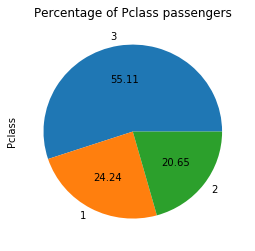

In [87]:
train_df['Pclass'].value_counts().plot.pie(figsize=(4, 4),
                                            autopct='%.2f',
                                            title="Percentage of Pclass passengers",
                                            fontsize = 10)

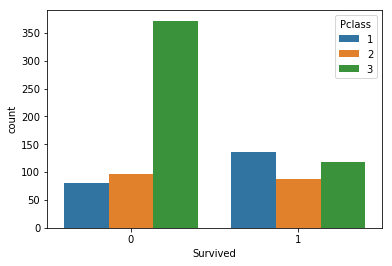

In [88]:
sns.countplot(x="Survived", hue="Pclass", data=train_df)

In [89]:
print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(train_df.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(test_df.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [90]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [91]:
drop_col=['Sex','Name','Cabin','Ticket','Embarked']
train_df.drop(drop_col, axis=1, inplace=True)
test_df.drop(drop_col, axis=1, inplace=True)

In [92]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [93]:
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [94]:
all_features = train_df.drop("Survived",axis=1)
targeted_feature = train_df["Survived"]

In [95]:
X_train,X_test,y_train,y_test = train_test_split(all_features,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [96]:
train_X = train_df.drop("Survived", axis=1)
train_Y=train_df["Survived"]
test_X  = test_df
train_X.shape, train_Y.shape, test_X.shape

((891, 6), (891,), (418, 6))

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estim=range(100,1000,100)
#This is the grid
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   27.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'n_estimators': range(100, 1000, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [98]:
model_rf.best_score_

0.7048260381593715

In [99]:
print('Accuracy = ', round((model_rf.best_score_)*100,2))

Accuracy =  70.48


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto')

decision_tree.fit(X_train, Y_train)

prediction_tree=model.predict(X_test)

print('Accuracy =',round(decision_tree.score(X_test,y_test)*100,2))

result_tree=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_tree.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

NameError: name 'decision_tree' is not defined

In [104]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7)

model.fit(X_train,y_train)

prediction_knn=model.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_knn,y_test)*100,2))

result_knn=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

NameError: name 'accuracy_score' is not defined

Accuracy = 72.01
Cross validated score = 69.71
[0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

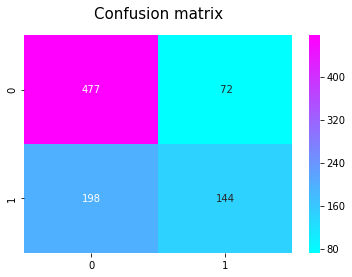

In [106]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import accuracy_score  #for accuracy_score

model = LogisticRegression()

model.fit(X_train,y_train)

prediction_lr=model.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_lr,y_test)*100,2))

result_lr=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)
print(y_pred)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

In [109]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)


# Best Estimator
modelf.best_estimator_
print('Accuracy = ', round((modelf.best_score_)*100,2))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 324 tasks      | elapsed:   32.4s
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed:   50.8s
[Parallel(n_jobs=4)]: Done 1524 tasks      | elapsed:  1.3min


Accuracy =  70.3


[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  1.5min finished


Accuracy 72.01
The cross validated score 69.83


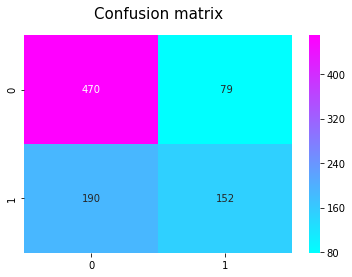

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_lda,y_test)*100,2))

result_lda=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score',round(result_lda.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)

Accuracy = 72.76
Cross validated score = 70.84


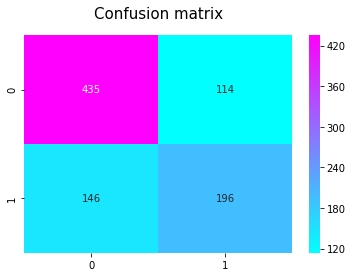

In [111]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
model_rf = RandomForestClassifier(criterion='gini', n_estimators=100,
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

model_rf.fit(X_train,y_train)

prediction_rm= model_rf.predict(X_test)

print('Accuracy =',round(accuracy_score(prediction_rm,y_test)*100,2))

result_rm=cross_val_score(model_rf,all_features,targeted_feature,cv=10,scoring='accuracy')

print('Cross validated score =',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model_rf,all_features,targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")

plt.title('Confusion matrix', y=1.05, size=15)


Accuracy 68.66
The cross validated score 66.59


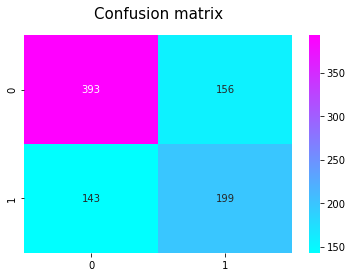

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

print('Accuracy',round(accuracy_score(prediction_gbc,y_test)*100,2))

result_gbc=cross_val_score(model,all_features,targeted_feature,cv=10,scoring='accuracy')

print('The cross validated score',round(result_gbc.mean()*100,2))

y_pred = cross_val_predict(model,all_features,targeted_feature,cv=10)

sns.heatmap(confusion_matrix(targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

In [113]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

100.0


In [114]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})

In [115]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
